In [98]:
#TODO
#Students' Names and IDs':
# Hazem Tarek Abdelhakam                1180509
# Mohamed Wael Saad-Zaghloul Elsayed    1180373

## Lab 4 - Random Variable Sampling
In this lab we'll look at (and write) some code as an application on sampling. <br>
We'll start by inspecting some widely-available library functions for generating rvs. <br>
Then we'll introduce code, using familar, and some new methods, to try and compete with these functions. <br>
There will be requirements in the TODO cells.

## Table of contents
1. [Introduction](#intro)
2. [Poisson distribution](#sp)
3. [Sampling Techniques](#sampling)
    1. [Discrete Inverse Transform method](#InvTr)
    2. [Acceptance Rejection method](#AR)
    3. [Composition method application](#comp)

In [99]:
#Make sure you have numpy installed
import matplotlib.pyplot as plt #plotting library
import numpy as np
import math
from scipy.stats import poisson

#### First, we'll look at built-in functions which we can use to sample from a distribution <a name="intro"></a>
> We're going to use the Poisson distribution, which is a discrete distribution, as an example

##### Since these are random variables, each time we run this code we'll get different results
> In order to facilitate grading and to compare different functions, we must set a seed. <br>
> The results given for a specific seed are deterministic, the ith run of the function always yields the same result <br>
**Note:** Scipy uses numpy.random() therefore setting the Numpy seed also sets it for Scipy. <br>
**Note:** Make sure to select the "Restart & Clear Output" in the Kernel tab in order to restart the RNG sequence. <br>

In [100]:
#Setting the seed for reproducibility
np.random.seed(seed=42)

### Poisson distribution <a name="sp"></a>
It's a discrete distribution that represents the number of arrivals in a certain time interval [0, t], given the arrival rate Lambda (which equals the 1/ mean $\lambda$) <br>
$$ P(k \ occurrences,\ \lambda) \ = \ \frac{\lambda^k.e^{-\,\lambda}}{k!}$$

>We'll define a function to print Poisson-distributed samples. <br>
>The function handles some aesthetic aspects not relevant to the lab. <br>
>Note: since "lambda" is a reserved word in Python, we'll use "lamda" instead in the code.

In [101]:
#Setting the parameters for our simulations, these will be constant throughout all of the techniques
num_samples = 100000
lamda = 6

##### These two utility functions are for plotting and comparing our data

In [102]:
#Dont modify this cell
def plot_samples(samples, title=f'Distribution of {num_samples} samples drawn from Poisson distribution with lambda={lamda}'):
    plt.figure(figsize=(10,5))
    bin_width = 1
    #arange is exclusive (stops before the final value), so we need to add  bin_width to our range
    #The value of the bin is found on its right, so we need another bin_width to view the final bin's value
    bins = np.arange(min(samples), max(samples) + 2*bin_width, bin_width, dtype=np.int32)
    hist = plt.hist(samples, bins=bins, density=True) #Setting density to True produces a prob. distribution (normalized y-axis)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('frequency')
    #make the x-value appear at the center of the plot
    rotation = 0
    if max(samples) > 30:
        rotation = 90
    plt.xticks(np.array(bins) + bin_width/2, np.arange(min(samples), max(samples) + 2*bin_width, dtype=np.int32), rotation=rotation)
    plt.show()
    return hist

In [103]:
#Dont modify this cell
def compare_hists(hist1, hist2):
    plt.figure(figsize=(10,5))
    #Pad with zeros for the shorter hist
    if len(hist1[0]) < len(hist2[0]):
        zeros = len(hist2[0]) - len(hist1[0])
        hist1 = (np.append(hist1[0], np.array([0]*zeros)), hist2[1])
    elif len(hist2[0]) < len(hist1[0]):
        zeros = len(hist2[0]) - len(hist1[0])
        hist2 = (np.append(hist2[0], np.array([0]*zeros)), hist1[1])
    diffs = hist1[0]-hist2[0]
    plt.bar(x=hist2[1][:-1], height=diffs)
    plt.plot([0]*len(hist1[1][:-1]))
    print("Mean difference: ", diffs.mean())

#### We'll look at one popular examples for ready-made functions to generate Poisson rvs
We'll treat these implementations as a reference, but note that no method is more accurate than the other in terms of output, what matters most is the performance.

#### Example: using Scipy.stats poisson.rvs function <a name="sp"></a>

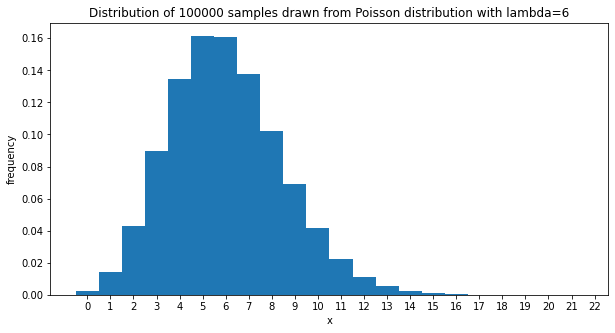

In [104]:
#Dont modify this cell
np.random.seed(seed=42)
samples_sp = poisson.rvs(lamda, size=num_samples)
hist_sp = plot_samples(samples_sp)

### Sampling techniques <a name="sampling"></a>
#### So how is this library function made?
#### We've studied different techniques in the lectures, such as:
1. Inverse transform sampling
2. Acceptance-rejection sampling 
3. Composition sampling  <br>
All of these techniques were based on the fact we know how to sample from a uniform distribution, using a pseudo-random number generator. <br>
For us, this sampling is done through the use of numpy's random.random() function, which generates a float value between 0 and 1.

### 1. Discrete Inverse transform sampling
<a name="InvTr"></a>
In this example, we will generate the Poisson RV using the general inverse transform algorithm<br>
Recall that the pmf of the Poisson distribution is 
$$ p_(k,\lambda)= \frac{\lambda^k.e^{-\lambda}}{k!}$$ <br>
We Want to find the number of occurances given the average, i.e. we want to sample $K$ for a given $\lambda$. <br>
It is easy to spot the recursive relation 
$$ p_({k+1},\lambda) = \frac{\lambda}{k+1}p_(k,\lambda) $$
Using this recursive equation, we can calculate the CDF on the go.


##### Generating a Poisson RV  using the general 'Inverse Transform' algorithm :
1. Generate a random number U
2. $K=0, p=e^{-\lambda}, F=p$
3. If $U<F$: set $X=K$ and stop
4. else: $p=\frac{\lambda p}{(K+1)}, F=F+p, K=K+1$
5. Go to step 3 again

>$Side$ $notes$:<br>
- Here, The Avg number of searches (iterations) made to find a sample is 1+$\lambda$ <br>
- As $\lambda$ grows, the number of searches to find a sample grows linearly <br>
- You can calculate the number of searches and print it if you want to verify this.
- This algorithm can be used for other pmf's as long as we can find a representation for the CDF.

In [105]:
#TODO cell
#implement the Inverse transform InvTR function that generates a random sample using the above algorithm
#inputs: 
    #lambda the average
#outputs:
    #X: sample
    #iterations: number of iterations to find X
def InvTR(lamda):
    X=0
    iterations=0
    U = np.random.random()
    #TODO find X
    K = 0
    p = math.exp(-lamda)
    F = p
    while True:
        iterations += 1
        if U < F:
            X = K
            return X, iterations
        p = (lamda * p) / (K + 1)
        F += p
        K += 1


sum steps 699499
avg steps 6.99499


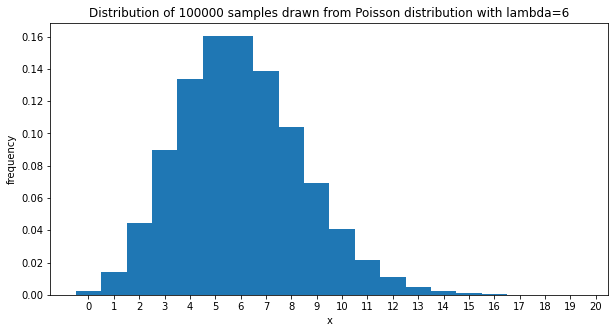

In [106]:
#Dont modify this cell
np.random.seed(seed=42)
samples=[]
sum_steps=0
for i in range(num_samples):
    x, steps = InvTR(lamda)
    samples.append(x)
    sum_steps += steps
print("sum steps",sum_steps)
print("avg steps",sum_steps/num_samples)
hist_inv1 = plot_samples(samples)

### 2. Acceptance-rejection sampling <a name="AR"></a>
The core idea is to generate a sample from an easier distribution q=g(x), and using some criteria, decide to accept or reject this sample. <br>
One fallback of rejection techniques is that they may take a lot of time due to rejecting too many values. <br>
This depends on the level of similarity between the function p=f(x) and the choosen generator q=g(x). <br>
In the following example, we will use p=f(x) as the Poisson distribution and q=g(x) is the Uniform distribution. <br>
$$ p_(k,\lambda)= \frac{\lambda^k.e^{-\lambda}}{k!}$$ <br>
- The generator function g(x) is a uniform distribution from a to b, and we will multiply it by c to make sure that our generator function always greater than the required p=f(x).
- Choose **c** such that  $c=Max\frac{p_j}{q_j}$ For all $x_j$ values in our range  a-b
- As shown in the below image, you can imagine it as if we encapsulate our distribution in a box, where the x-axis go from a to b. <br>
- We then generate two values, u1 and u2, which are then scaled appropriately in order to act as the x and y coordinates of a random point inside our rectangle. <br>
- Then calculate the value of our function f(x) at this x-coordinate to get yactual=f(x)
- if our sample value is less than the actual function value, we accept it
- else we reject and generate another point. <br>
![alt text](ar.png "Title")
Algorithm Steps:
1. Generate $u_1,u_2$
2. Get $C= Max \frac{p_j}{q_j} for all j$
3. let x_i = uniform random variable from the range a to b.    <br>  $x_i=n*(u_1) +a, $  $\;\;\;\;\;\;$ $n=b-a+1$ 
4. let y_i=unifrom random variable from the range 0 to 1    <br>  $y_i=u_2$
5. Calculate $yactual_i = f(x_i)$
6. If $y_i<yactual_i/(c*q_i)$, let $X=x_i$
7. else go to step 3

>$Side$ $notes$:<br>
- This approach is extremely general and works on arbitrary functions and is not intended for the Poisson or uniform  distributions only <br>
- One disadvantage is we have to specify a and b, which makes it unsuitable for general libraries where we don't know the input well. <br>
- It is proven that the average number of trials until an acceptance equals **c**. <br>
- Finding the distribution $q$ that minimizes the value of $c$ is therefore essential to this algorithm's performance.

Now let's try it .....


In [107]:
#Dont modify this cell
#Pre-computed factorials to make the function faster
fac_max = 30
fac = np.zeros(fac_max)
fac[0] = fac[1] = 1
for i in range(2,fac_max):
    fac[i] = i * fac[i-1]

In [108]:
#Dont modify this cell
#Define our f(x), g(x) pmf's as a lambda functions    
fx = lambda lamda,k: np.exp(-lamda)*((lamda**int(k))/(fac[int(k)]))
gx = lambda k: 1/(b-a+1)

In [109]:
#TODO cell
#implement get_max function to find C "the maximum possible y value of the pmf function" in the interval x= [a , b].
#imputs: 
    #fx: the probability mass function of our distribution f(x)
    #lambda: the arrival rate (mean) of the exponential distribution governing the inter-arrival times
    #a: minimum x value
    #b: maximum x value
#outputs:
    #C: maximum y value of the pmf
def get_max(fx, gx, lamda, a, b):
    c = -1e9 
    #TODO find C
    x = a
    while x <= b:
        v = fx(lamda, x) / gx(x)
        if (v > c): c = v
        x += 0.1
    return c

In [110]:
#TODO cell
#implement AC_RJ function to find a sample x using the acceptance rejection_ monte carlo method
#imputs: 
    #fx: the probability mass function of the poission distribution f(x)
    #gx: the probability mass function of the uniform distribution g(x)
    #lambda: the arrival rate (mean) of the exponential distribution governing the inter-arrival times
    #a: minimum x value
    #b: maximum x value
    #C: maximum y value of the pmf in the interval x= [a , b]
#outputs:
    #X: sample
    #iterations: number of iterations to find X
def AC_RJ(fx, gx, lamda, a, b, c):
    X=0
    iterations=0
    while True:
        iterations += 1
        U1 = np.random.random()
        U2 = np.random.random()
        x_i = (b - a + 1) * U1 + a
        y_i = U2
        y_actual = fx(lamda, x_i)
        v = y_actual / (c * gx(x_i))
        if (y_i < v):
            X = x_i
            return X, iterations

sum steps 384883
avg steps: 3.84883


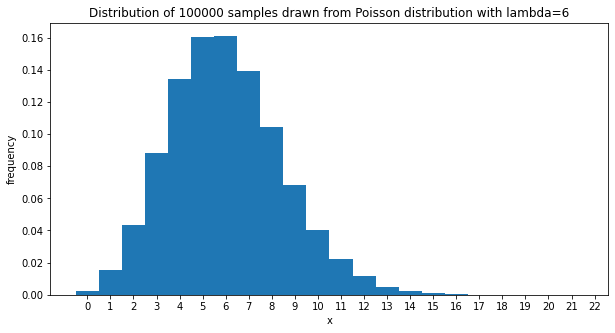

In [111]:
#Dont modify this cell
np.random.seed(seed=42)
samples = []
a = 0
b = len(hist_sp[1])
c = get_max(fx, gx, lamda, a, b)
sum_steps = 0
for i in range(num_samples):
    x, steps = AC_RJ(fx, gx, lamda, a, b, c)
    samples.append(x)
    sum_steps += steps
print("sum steps", sum_steps)
print("avg steps:", sum_steps/num_samples)
hist_rej1 = plot_samples(samples);

Mean difference:  -4.189732969100589e-19


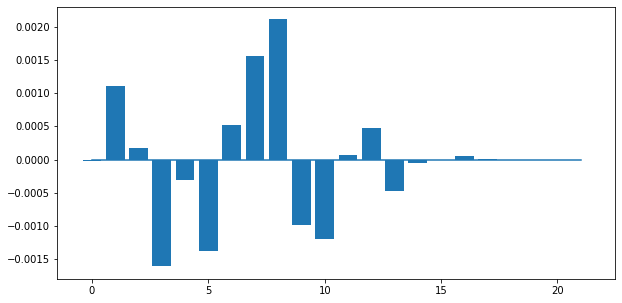

In [112]:
#Dont modify this cell
compare_hists(hist_rej1, hist_sp)

### 3. Composition method -bonus <a name="comp"></a>
using the composition method, it is required to generate samples from the following pmf f(x) in the range x= [0-15]


$$
f(x) = \left\{
    \begin{array}\\
        poisson(\lambda =1) & \mbox{if } \ x \in [0,5) \\
         poisson(\lambda =10) & \mbox{if } \ x \in [5,15] \\
    \end{array}
\right.
$$
Hints: 
- First we generate U to determine which exponential to sample from (according to their weights). <br>
- Then after selecting a poisson exponential, we sample from it using any sampling method as before.

In [113]:
#TODO cell
#implement PO_COMP function to find a sample x 
#bonus
#outputs:
    #X: sample
    #iterations: number of iterations to find X
def PO_COMP():
    X=0
    # iterations=0
    U = np.random.random()
    #TODO find X
    x_i = 16 * U
    if x_i < 5:
        X, iterations = InvTR(1)
    else:
        X, iterations = InvTR(10)
    return X, iterations

sum steps 819655
avg steps 8.19655


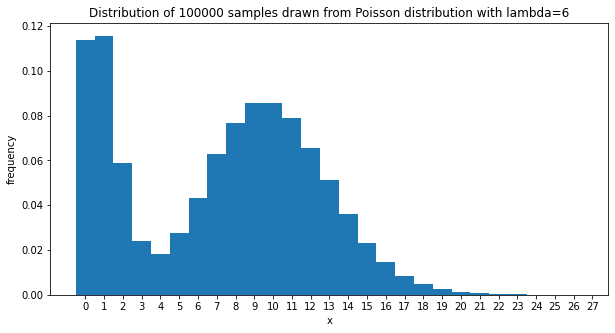

In [114]:
#Dont modify this cell
np.random.seed(seed=42)
samples=[]
sum_steps=0
for i in range(num_samples):
    x, steps = PO_COMP()
    samples.append(x)
    sum_steps += steps
print("sum steps",sum_steps)
print("avg steps",sum_steps/num_samples)
hist_comp1 = plot_samples(samples)

### Conclusion
In this lab, we demonstrated how to use built-in functions for generating rvs, as well as to how to make our own functions, exploring several techniques, and pointing out their advantages and disadvantages. <br>
good job!.